In [17]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from sns_toolbox.neurons import SpikingNeuron
from sns_toolbox.connections import SpikingSynapse
from sns_toolbox.networks import Network
from sns_toolbox.renderer import render

import numpy as np
import matplotlib.pyplot as plt



In [ ]:
t = np.arange(0, 500, 1)
spikes = np.zeros([1, len(t)])
spikes[0, 5] = 1

trace1 = np.zeros([1, len(t)])
trace = trace1[0]

A = 1

for i in range(len(spikes[0])):
    if spikes[0, i] == 1:
        print('Spike!')
        trace[i] = 1
    if trace[i-1] != 0:
        trace[i] = trace[i-1] * (1-0.01)



A_pos = 0.05
A_neg = 0.05
tou_pos = 5.0 # ms
tou_neg = 5.0 # ms

tp = np.arange(-60, 60, 0.01)

W_p = A_pos * np.exp(tp[0:6000] / tou_pos)
W_d = -A_neg * np.exp(-tp[6000:-1] / tou_neg)

def weightUpdate(dt):
    A_pos = 0.05 # Max potentiation level
    A_neg = 0.05 # Max Depression value
    tou_pos = 5.0 # ms. Decay time constant for potentiation
    tou_neg = 5.0 # ms. Decay time constant for depression
    # If dt is positive, that means that the postsynaptic neuron spiked before the presynaptic. DEPRESSION
    if dt > 0:
        weight_change = -A_neg * np.exp(-dt / tou_neg)
    # If dt is negative, that means the presynaptic neuron spiked before the postsynaptic. POTENTIATION
    if dt <= 0:
        weight_change = A_pos * np.exp(dt / tou_pos)
    return weight_change

def weightUpdate2(dt):
    A_pos = 0.05 # Max potentiation level
    A_neg = 0.05 # Max Depression value
    tou_pos = 5.0 # ms. Decay time constant for potentiation
    tou_neg = 5.0 # ms. Decay time constant for depression
    # If dt is positive, that means that the postsynaptic neuron spiked before the presynaptic. DEPRESSION
    if dt > 0:
        weight_change = A_neg * np.exp(dt / tou_neg)
    # If dt is negative, that means the presynaptic neuron spiked before the postsynaptic. POTENTIATION
    if dt <= 0:
        weight_change = -A_pos * np.exp(-dt / tou_pos)
    return weight_change


points = []
tm = [-40, -30, -20, -10, 0, 12.5, 16]
# tm = [-0.5999, 15.5999]
for i in tm:
    points.append(weightUpdate(i))
print(points)


vt = [0, 0]
vp = [0.9, -0.90]
# So i could add a variable that would save the current time stamp every time a presynaptic spike fires. 
# Then, when a postsynaptic spike fires, it would look at the timestamps of all the presynaptic neurons and update their connection weights based on spike timing.
# This also means that if a presynaptic spike fires, it would need to check the timestamps of all the postsynaptic neurons. If a post synaptic neuron has recently fired, then it would undergo potentiation. 

Spike!
[np.float64(1.6773131395125595e-05), np.float64(0.00012393760883331792), np.float64(0.000915781944436709), np.float64(0.0067667641618306355), np.float64(0.05), np.float64(-0.0041042499311949405), np.float64(-0.0020381101989183107)]


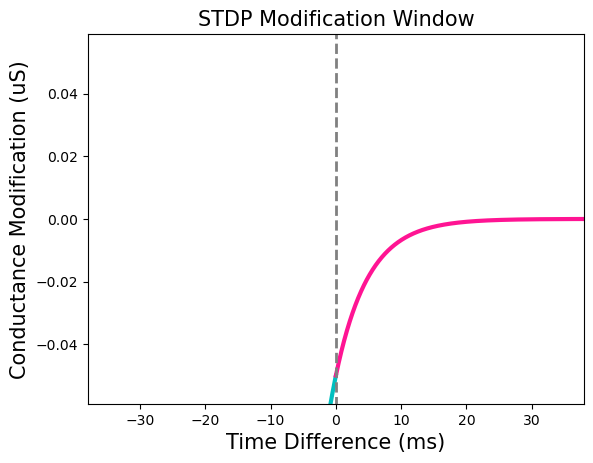

In [19]:
plt.figure()
# plt.plot(t, spikes[0])
plt.plot(tp[0:6000], W_p, color='c', linewidth='3')
plt.plot(tp[6000:-1], W_d, color='deeppink', linewidth='3')

plt.plot(vt, vp, '--', color='gray', linewidth='2')

plt.ylim([-0.059, 0.059])
plt.xlim([-38, 38])

# plt.plot(tm, points, 'o', ms='5')
plt.ylabel('Conductance Modification (uS)', size='15')
plt.xlabel('Time Difference (ms)', size='15')
plt.title('STDP Modification Window', size='15')

plt.savefig('STDPWindow.png', dpi=600)
plt.show()

In [20]:
points

[np.float64(1.6773131395125595e-05),
 np.float64(0.00012393760883331792),
 np.float64(0.000915781944436709),
 np.float64(0.0067667641618306355),
 np.float64(0.05),
 np.float64(-0.0041042499311949405),
 np.float64(-0.0020381101989183107)]

net = Network()
spi1 = SpikingNeuron(
    threshold_proportionality_constant=0.0,
    threshold_initial_value=1.0
)
spi2 = SpikingNeuron(
    threshold_proportionality_constant=0.0,
    threshold_initial_value=1.0
)
spiC = SpikingSynapse(
    max_conductance=5.7,
    reversal_potential=2.0
)

net.add_neuron(spi1, name='presynaptic')
net.add_neuron(spi2, name='postsynaptic')
net.add_connection(spiC, source='presynaptic', destination='postsynaptic')

net.add_input(dest='presynaptic')
net.add_output(source='postsynaptic', spiking=True)
net.add_output(source='postsynaptic', spiking=False)
net.add_output(source='presynaptic', spiking=True)

render(net)

dt = 0.01
tmax = 22
t = np.arange(0, tmax, dt)

model = net.compile(dt=dt, backend='numpy', debug=False)

inputs = np.zeros([len(t), net.get_num_inputs()])
inputs[0:2000,0] += 3.5

data = np.zeros([len(t), net.get_num_outputs_actual()])


for i in range(len(t)):
    data[i,:] = model(inputs[i,:], current_time=t[i])
data = data.transpose()

plt.figure(figsize=[27,3])
plt.plot(t, data[0,:], label='post spikes')
plt.plot(t, data[1,:], label='post voltage')
plt.show()

plt.figure(figsize=[27,3])
plt.plot(t, data[2,:], label='pre voltage')
plt.show()